## Motivation for Factor Models

Factors drive risk premiums.While some factors might describe fundemental, economic variables such as growth, inflation, volatility, productivity, others consist of treadble investment styles such as value-growth or momentum.

Alternatively, understanding the factor loadings of the individual assets allows us to estimate the covariance of our returns. We state without proof that if one understands the factor loadings and the covariance of the factor returns, one can then compute an estimate for the covariance of the assets themselves.

Finally factor models can also be used for hedging. We again state without proof that the factor loadings represent the hedging ratio one would use to minimize the volatility of your portfolio.

Here are formal definitions of the Factors explaining the asset returns with a five-factor model:

1) World Equity: Monthly returns of MSCI World Index minus the US.

2) US Treasury: 3-month T-bill rate.

3) Bond Risk Premia: return of Barclay's corporate high-yield $ index minus return of US treasuries

4) Inflation Protection: This is a "style" factor that considers the difference between real and nominal returns, thus balances the need for both. Measured by return of TIPS.

5) Currency Protection: This is also a "style" factor that includes risk premium for US domestic assets. Constructed as a currency index (Long USD, short capweighted bundle of Foreign Currencies)

The Variables are:

1. US equities: wilshire 5000 total market rerutn index

2. Real Estate: FTSE all REIT index

3. Commodities: S&P GSCI index

4. Corp Bonds: Barclays US corp investment grade index

This analysis was motivated by "FLEXIBLE INDETERMINATE FACTOR-BASED ASSET ALLOCATION".

which lays out hybrid approach based on several prominant asset allocation approaches. This approach uniquely utilizes various factors in order to build a more resilient and rigorous foundation.


https://dash.harvard.edu/bitstream/handle/1/27716504/47611405.pdf?sequence=1

In [1]:
#import all the necessary packages
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import importlib as imp

import FactorModelLib as fm #the code that wraps around the sikitlearn implementations
import config


import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv('Data_Oct2018_v2.csv')
all_data.head()
all_data[config.dateName] = pd.to_datetime(all_data[config.dateName])

In [3]:
fff = pd.read_csv("master.csv")
fff.head()
fff[config.dateName] = pd.to_datetime(fff.iloc[:,0])

In [4]:
master = pd.read_csv("master.csv", na_values=-99.9)
master.head()
master[config.dateName] = pd.to_datetime(master[config.dateName])

In [5]:
master.columns = master.columns.str.strip()
master.columns

Index(['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'World Equities',
       'US Treasuries', 'Bond Risk Premium', 'Inflation Protection',
       'Currency Protection', 'Regime-5', 'Regime-7', 'US Equities',
       'Real Estate', 'Commodities', 'Corp Bonds', 'Convertible Arbitrage',
       'CTA Global', 'Distressed Securities', 'Emerging Markets',
       'Equity Market Neutral', 'Event Driven', 'Fixed Income Arbitrage',
       'Global Macro', 'Long/Short Equity', 'Merger Arbitrage',
       'Relative Value', 'Short Selling', 'Funds Of Funds'],
      dtype='object')

In [6]:
master['Mkt'] = master['Mkt-RF'] + master['RF']

In [7]:
startDate = all_data[config.dateName].min()
endDate = all_data[config.dateName].max()

In [8]:
startDate = master[config.dateName].min()
endDate = master[config.dateName].max()

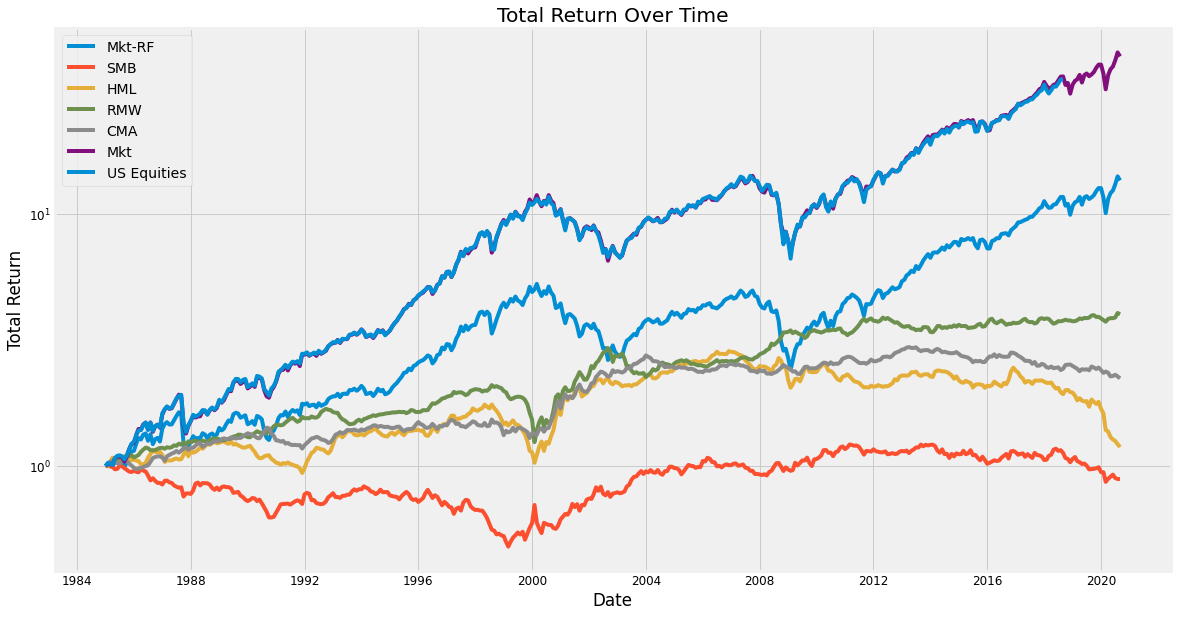

In [9]:
name = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'Mkt','US Equities']

fm.plot_returns(master, name, flag='Total Return')

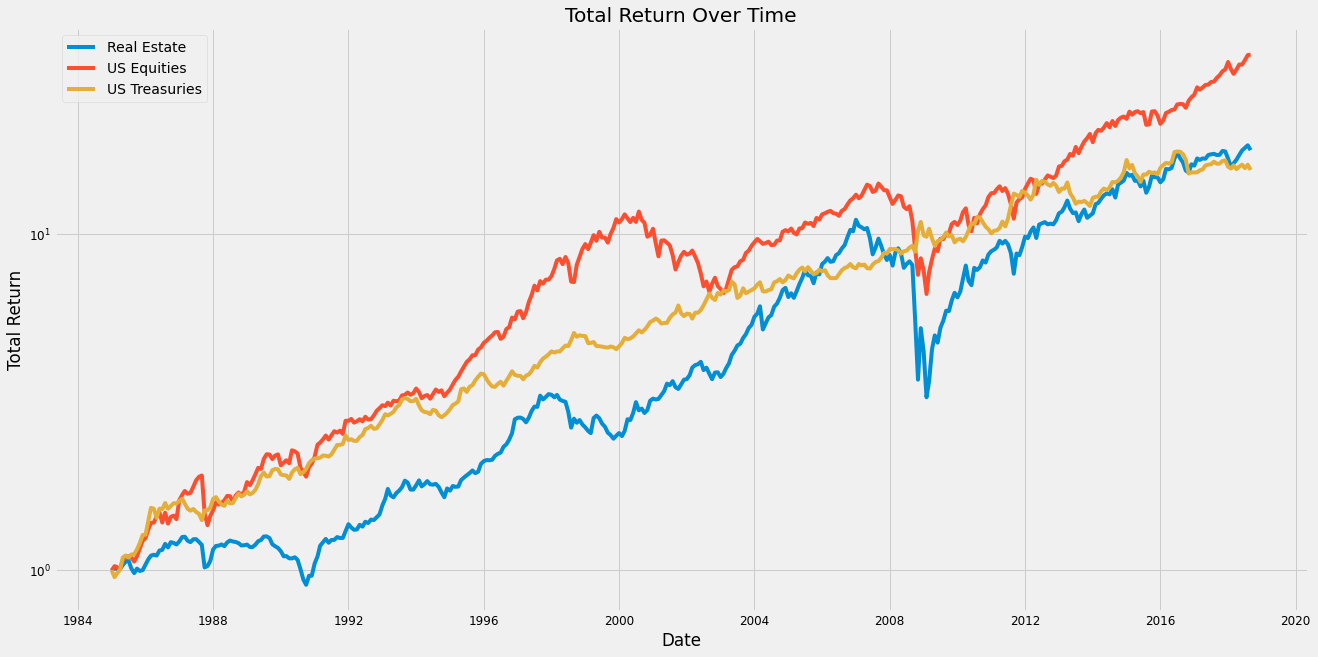

In [10]:
name = ['Real Estate', 'US Equities', 'US Treasuries']
fm.plot_returns(all_data, name, flag='Total Return')

## Drawbacks

traditional OLS regression suffers from noise-variable issue as there's no mechanism to filter out noise variables
furthermore, the stationarity assumes the model assumes constant factor loadings over time. Factor loadings could also be corelated, and returns could be normally distributed and loadings are not necessarily additive, I'm going to ignore the last few objections. While various ML techniques (eg. regulirazation) could be used to filter out noise variables, regieme switching techniques could be used to illustrate differente factors in normal versus crash periods.

we can define normal regime as any none negative US equity return and crash period as strictly negative return to see how the loadings might differ across predictors.

In [16]:
ass_list = ['US Equities', 'Real Estate', 'Corp Bonds', 'Commodities']
dfs = []
for x in ass_list:
    options = fm.create_options()
    options['nameOfReg'] = 'OLS full data'
    r = fm.linear_regression(all_data, x, config.factorName, options)
    dfs.append(r)

all_ret = pd.concat(dfs, ignore_index=False)
all_ret

Dependent Variable is US Equities
Time period is between January 1985 to September 2018 inclusive   
               Intercept  World Equities  US Treasuries  Bond Risk Premium  \
OLS full data   0.000049        0.536876       0.579876            0.61014   

               Inflation Protection  Currency Protection  
OLS full data              0.083233             0.625217  
Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
               Intercept  World Equities  US Treasuries  Bond Risk Premium  \
OLS full data  -0.003587        0.310261       1.212508           1.054238   

               Inflation Protection  Currency Protection  
OLS full data              0.287919              0.36184  
Dependent Variable is Corp Bonds
Time period is between January 1985 to September 2018 inclusive   
               Intercept  World Equities  US Treasuries  Bond Risk Premium  \
OLS full data   0.001694        0.004594       0.805775            0.3

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
US Equities,0.536876,0.579876,0.610140,0.083233,0.625217
Real Estate,0.310261,1.212508,1.054238,0.287919,0.361840
Corp Bonds,0.004594,0.805775,0.359770,0.022835,-0.148184
Commodities,0.255708,-0.095741,0.133667,0.583607,-0.884024


In [15]:
ass_list = ['US Equities', 'Real Estate', 'Corp Bonds', 'Commodities']
dfs = []
for x in ass_list:
    options = fm.create_options()
    options['returnModel'] = True
    options['printLoadings'] = False
    normalData = all_data[all_data['US Equities'] > 0].copy()
    options['nameOfReg'] = 'OLS Normal'
    r = fm.linear_regression(normalData, x, config.factorName, options)
 
    dfs.append(r)

ass_norm = pd.concat(dfs, ignore_index=False)
ass_norm

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
US Equities,0.365891,0.390577,0.335783,0.190876,0.395218
Real Estate,0.150220,1.302860,1.100558,0.210193,0.051830
Corp Bonds,0.021382,0.851804,0.390362,-0.001594,-0.011105
Commodities,0.288811,-0.181565,0.116150,0.313179,-0.230515


In [12]:
ass_list = ['US Equities', 'Real Estate', 'Corp Bonds', 'Commodities']
dfs = []
for x in ass_list:
    options = fm.create_options()
    options['returnModel'] = True
    options['printLoadings'] = False
    crashData = all_data[all_data['US Equities'] <= 0].copy()
    options['nameOfReg'] = 'OLS Crash'
    r = fm.linear_regression(crashData, x, config.factorName, options)
  
    dfs.append(r)
ass_Crash = pd.concat(dfs, ignore_index=False)
ass_Crash

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
US Equities,0.364640,0.417746,0.476613,0.065731,0.382234
Real Estate,0.365824,0.959781,0.792532,0.540801,0.588727
Corp Bonds,-0.009902,0.705628,0.313724,0.072184,-0.394005
Commodities,0.267339,-0.150789,0.073294,0.972686,-1.939597


Take Real Estate For example, the world equities coefficient doubled from normal period to crash and inflation protection also more than doubled while Bond Risk Premium and US treasuried dropped by almost 40%! finally the currency risk is 10x as much in crash times as it is in normal period.

## Trend Filtering

The goal of trend filtering is to smooth out a time-series by filtering out the ‘noise’. The trend filtering algorithm faces a trade-off between two objectives. Firstly, it wants to minimise the residual ‘noise’ between the actual and smooth series. Secondly, it wants to maximise the smoothness of the filtered series, which tends to be at odds with the first objective.

In [249]:
# Import Data
import pandas as pd
SP500_data = pd.read_csv('SP500.csv',index_col=0, header=0,parse_dates=[0])
SP500_data[275:293]

,SP500,SP500TR
DATE,,
2007-12-01,-0.6788,1299.3144
2008-01-01,-5.9982,1221.3789
2008-02-01,-3.2483,1181.7048
2008-03-01,-0.4318,1176.6022
2008-04-01,4.8721,1233.9275
2008-05-01,1.2953,1249.9105
2008-06-01,-8.4304,1144.5381
2008-07-01,-0.8400,1134.9240
2008-08-01,1.4465,1151.3406


In [15]:
import TF
import numpy as np
from pandas.plotting import register_matplotlib_converters
import pandas as pd
import scipy
import matplotlib.pyplot as plt

! python -m pip install cvxpy

import cvxpy as cp
import seaborn as sns
sns.set()
register_matplotlib_converters()

#%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [16]:
def filter_plot(data,lambda_value,regime_num=0, TR_num=1):
    ret_sp = data.iloc[:,regime_num]
    sp500TR = data.values[:,TR_num]

    beta_value = trend_filtering(ret_sp.values,lambda_value)
    betas = pd.Series(beta_value,index=data.index)

    plt.figure(figsize=(12,9))
    plt.plot(ret_sp, alpha=0.4,label='Original Series')
    plt.plot(betas,label='Fitted Series')
    plt.xlabel('Year')
    plt.ylabel('Monthly Return (%)')
    plt.legend(loc='upper right')
    plt.show()

In [18]:
def trend_filtering(data,lambda_value):
    '''Runs trend-filtering algorithm to separate regimes.
        data: numpy array of total returns.'''

    n = np.size(data)
    x_ret = data.reshape(n)

    Dfull = np.diag([1]*n) - np.diag([1]*(n-1),1)
    D = Dfull[0:(n-1),]

    beta = cp.Variable(n)
    lambd = cp.Parameter(nonneg=True)

    def tf_obj(x,beta,lambd):
        return cp.norm(x-beta,2)**2 + lambd*cp.norm(cp.matmul(D, beta),1)

    problem = cp.Problem(cp.Minimize(tf_obj(x_ret, beta, lambd)))

    lambd.value = lambda_value
    problem.solve()

    return beta.value

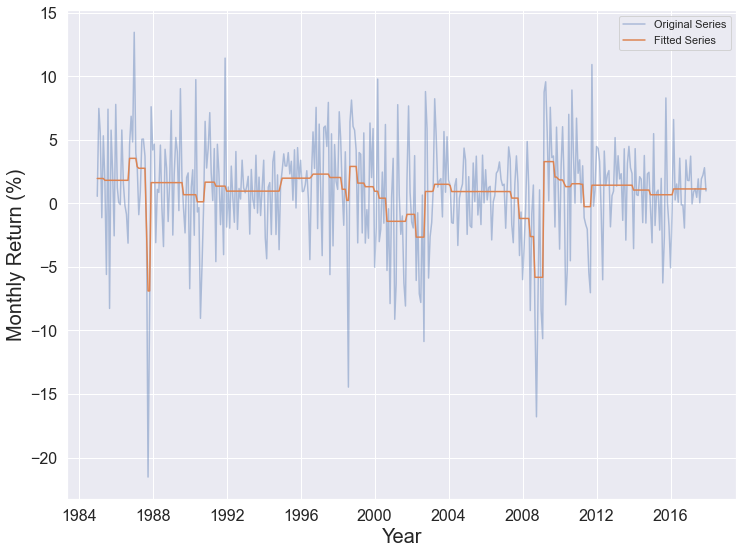

In [19]:
filter_plot(SP500_data,lambda_value=16)

In [250]:
def plot_regime_color(dataset, regime_num=0, TR_num=1, lambda_value=16, log_TR = True):
    '''Plot of return series versus regime'''
    returns = dataset.iloc[:,regime_num]
    TR = dataset.iloc[:,TR_num]
    betas = trend_filtering(returns.values,lambda_value)
    regimelist = regime_switch(betas)
    curr_reg = np.sign(betas[0]-1e-5)
    y_max = np.max(TR) + 500
    
    if log_TR:
        fig, ax = plt.subplots()
        
        for i in range(len(regimelist)-1):
            
            if curr_reg == 1:
                ax.axhspan(0, y_max+500, xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
                       facecolor='white', alpha=0.3)
            else:
                ax.axhspan(0, y_max+500, xmin=regimelist[i]/regimelist[-1], xmax=regimelist[i+1]/regimelist[-1], 
                       facecolor='red', alpha=0.5)
            curr_reg = -1 * curr_reg
        
        ax.axhspan(0, 3000, xmin = 0.166667, xmax = 0.1893939, facecolor='yellow', alpha=0.5)
        ax.axhspan(0, 3000, xmin = 0.489899, xmax = 0.5126263, facecolor='yellow', alpha=0.5)
        ax.axhspan(0, 3000, xmin = 0.694444, xmax = 0.7474747, facecolor='yellow', alpha=0.5)
        fig.set_size_inches(15,9)   
        plt.plot(TR, label='Total Return')
        plt.ylabel('SP500 Log-scale')
        plt.xlabel('Year')
        plt.yscale('log')
        plt.xlim([dataset.index[0], dataset.index[-1]])
        plt.ylim([80, 3000])
        plt.yticks([100, 500, 1000, 2000, 3000],[100, 500, 1000, 2000, 3000])
        plt.title('Regime Plot of SP 500', fontsize=24)
        plt.show()

In [251]:
returns = SP500_data.iloc[:,0]
TR = SP500_data.iloc[:,1]
betas = trend_filtering(returns.values,16)
regimelist = regime_switch(betas)

In [252]:
regimelist

[0, 32, 35, 188, 213, 274, 290, 316, 321, 396]

In [253]:
regimelist[-1]

396

In [254]:
def regime_switch(betas,threshold=1e-5):
    '''returns list of starting points of each regime'''
    n = len(betas)
    init_points = [0]
    curr_reg = (betas[0]>threshold)
    for i in range(n):
        if (betas[i]>threshold) == (not curr_reg):
            curr_reg = not curr_reg
            init_points.append(i)
    init_points.append(n)
    return init_points

In [255]:
def filter_plot(data,lambda_value,regime_num=0, TR_num=1):
    ret_sp = data.iloc[:,regime_num]
    sp500TR = data.values[:,TR_num]

    beta_value = trend_filtering(ret_sp.values,lambda_value)
    betas = pd.Series(beta_value,index=data.index)

    plt.figure(figsize=(15,9))
    plt.plot(ret_sp, alpha=0.4,label='Original Series')
    plt.plot(betas,label='Fitted Series')
    plt.xlabel('Year')
    plt.ylabel('Monthly Return (%)')
    plt.legend(loc='upper right')
    plt.show()

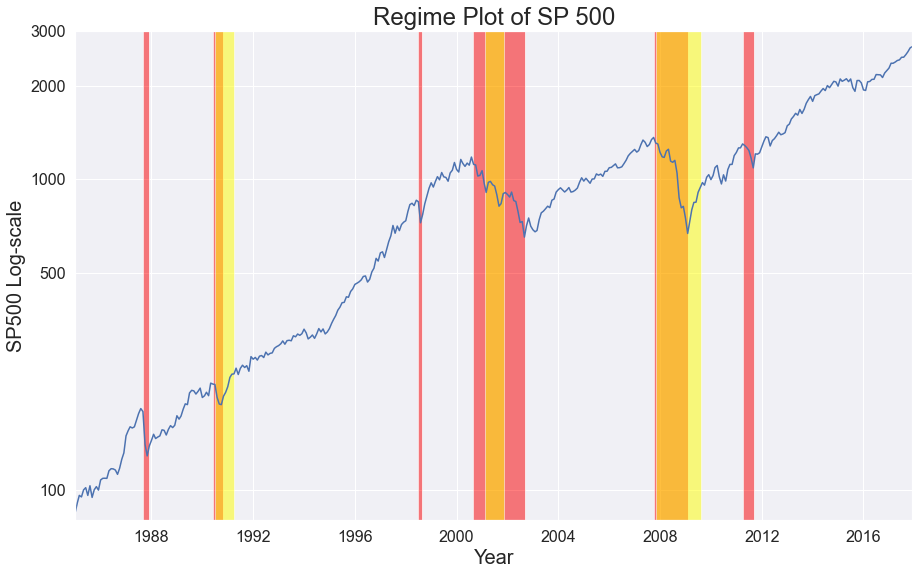

In [265]:
plot_regime_color(SP500_data, lambda_value=15)


The region in red are those that Trend filtering deemed as "crash regimed". Those highlighted in yellow are actual contractions as designated by NBER
https://www.nber.org/research/business-cycle-dating


as we increase the lambda value, the algorithm becomes more conservative and larger drop is required for it to classify a drop as crash and vice versa. lower lambda yields more crash regimes.

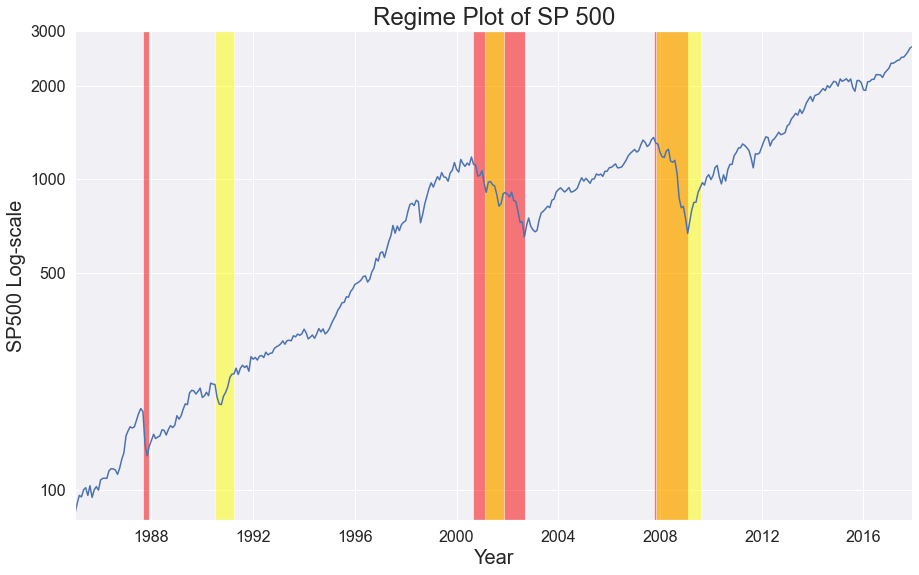

In [267]:
plot_regime_color(SP500_data, lambda_value=18)

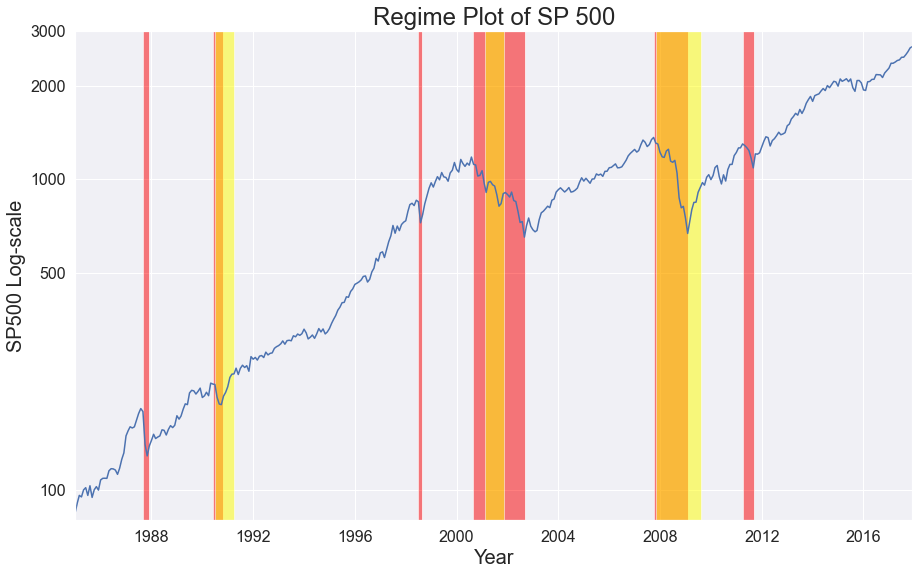

In [268]:
plot_regime_color(SP500_data, lambda_value=14)

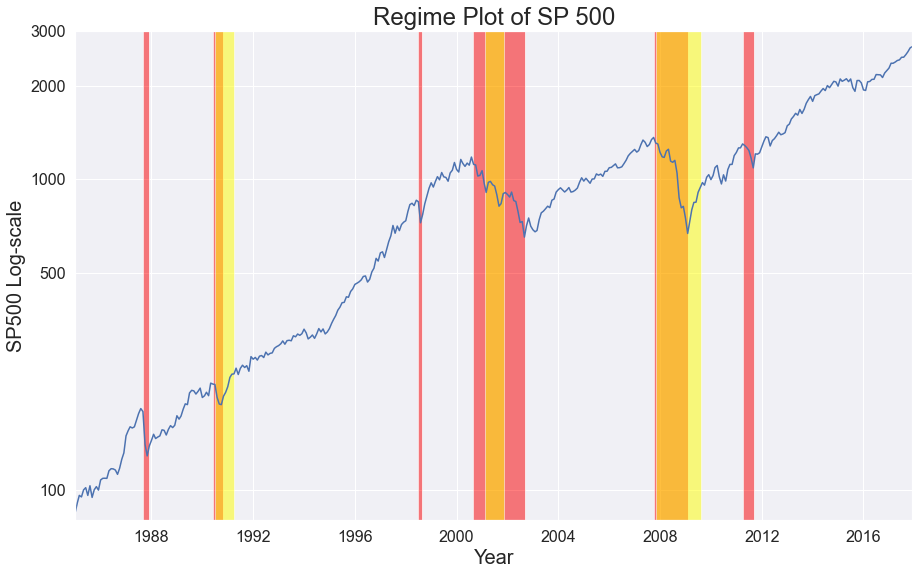

In [270]:
plot_regime_color(SP500_data, lambda_value=15)